In [1]:
import os 

os.chdir('/home/jupyter-choi/')
print(os.getcwd())



/home/jupyter-choi


In [2]:
import neurokit2 as nk  
import matplotlib.pyplot as plt
def find_pqr(signal, sr):
    try:
        signals = signal.reshape(-1,)
        signals = nk.ecg_clean(signals, sr, method='neurokit') #디노이징
        _, rpeaks = nk.ecg_peaks(signals, sampling_rate = sr)
        _, waves_peak = nk.ecg_delineate(signals, rpeaks, sampling_rate = sr, method='peak')

        r_peaks = np.array(rpeaks['ECG_R_Peaks'])
        r_peaks = r_peaks[~np.isnan(r_peaks)].astype('int')

        p_peaks = np.array(waves_peak['ECG_P_Peaks'])
        p_peaks = p_peaks[~np.isnan(p_peaks)].astype('int')

        q_peaks = np.array(waves_peak['ECG_Q_Peaks'])
        q_peaks = q_peaks[~np.isnan(q_peaks)].astype('int')

        s_peaks = np.array(waves_peak['ECG_S_Peaks'])
        s_peaks = s_peaks[~np.isnan(s_peaks)].astype('int')

        t_peaks = np.array(waves_peak['ECG_T_Peaks'])
        t_peaks = t_peaks[~np.isnan(t_peaks)].astype('int')

        plt.figure(figsize=(20,6))
        plt.plot(signals)
        plt.plot(p_peaks, signals[p_peaks], "o", markersize = 6, label = 'P_peaks')
        plt.plot(q_peaks, signals[q_peaks], "o", markersize = 6, label = 'Q_peaks')
        plt.plot(r_peaks, signals[r_peaks], "o", markersize = 6, label = 'R_peaks')
        plt.plot(s_peaks, signals[s_peaks], "o", markersize = 6, label = 'S_peaks')
        plt.plot(t_peaks, signals[t_peaks], "o", markersize = 6, label = 'T_peaks')
        plt.legend()
        plt.show()
    except ValueError as e:
        print(f"ValueError: {e}")
        # 오류가 발생한 경우 NaN 배열을 반환하여 시각화 부분에서 건너뜁니다.
        return np.full_like(signal, np.nan)
 
        

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

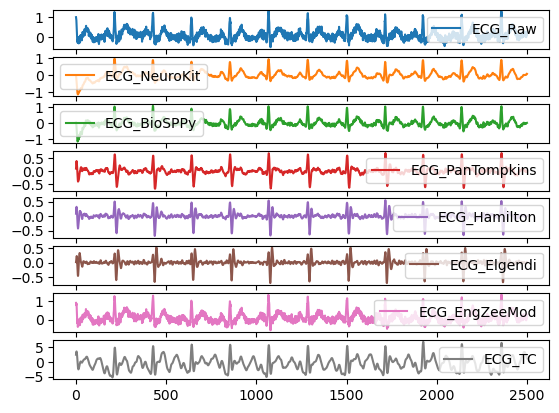

In [6]:
import pandas as pd

import numpy as np

import neurokit2 as nk

ecg = nk.ecg_simulate(duration=10, sampling_rate=250, noise=0.2)
ecg += np.random.normal(0, 0.1, len(ecg))  # Add Gaussian noise

signals = pd.DataFrame({
    "ECG_Raw" : ecg,
    "ECG_NeuroKit" : nk.ecg_clean(ecg, sampling_rate=250, method="neurokit"),
    "ECG_BioSPPy" : nk.ecg_clean(ecg, sampling_rate=250, method="biosppy"),
    "ECG_PanTompkins" : nk.ecg_clean(ecg, sampling_rate=250, method="pantompkins1985"),
    "ECG_Hamilton" : nk.ecg_clean(ecg, sampling_rate=250, method="hamilton2002"),
    "ECG_Elgendi" : nk.ecg_clean(ecg, sampling_rate=250, method="elgendi2010"),
    "ECG_EngZeeMod" : nk.ecg_clean(ecg, sampling_rate=250, method="engzeemod2012"),
    "ECG_TC" : nk.ecg_clean(ecg, sampling_rate=250, method="templateconvolution")
}) 

signals.plot(subplots=True)


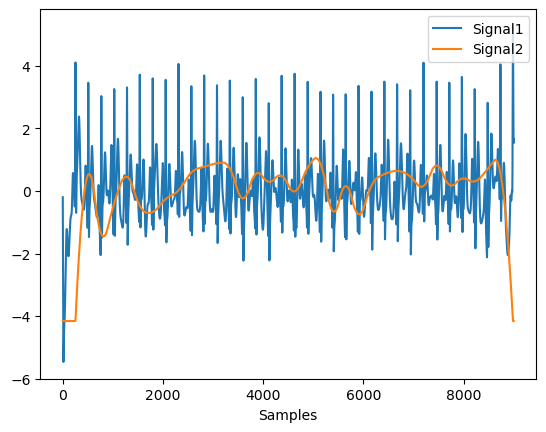

In [7]:
import neurokit2 as nk

ecg = nk.ecg_simulate(duration=30, sampling_rate=300, noise=0.2)

ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=300)

quality = nk.ecg_quality(ecg_cleaned, sampling_rate=300)

nk.signal_plot([ecg_cleaned, quality], standardize=True)

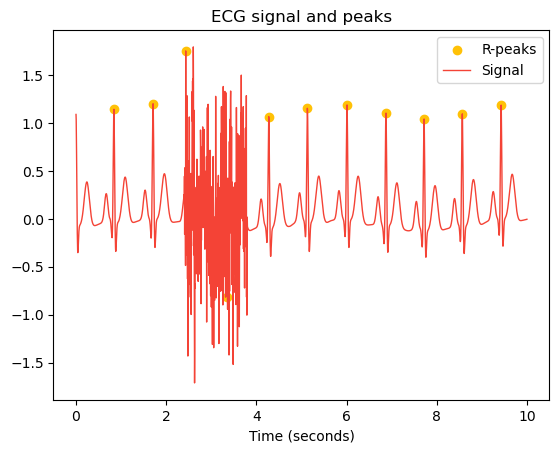

In [9]:
import neurokit2 as nk

import numpy as np

ecg = nk.ecg_simulate(duration=10, sampling_rate=250)

ecg[600:950] = ecg[600:950] + np.random.normal(0, 0.6, 350)

signals, info = nk.ecg_peaks(ecg, sampling_rate=250, correct_artifacts=True, show=True)

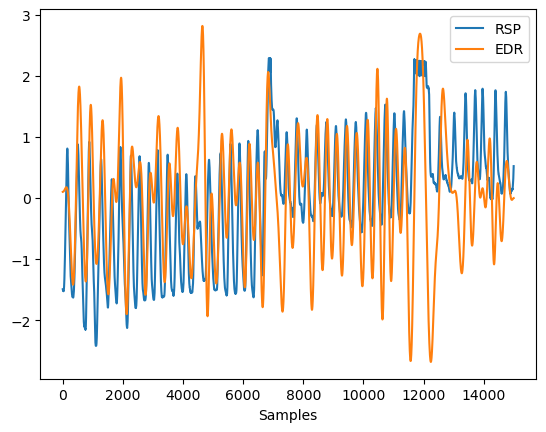

In [10]:
import neurokit2 as nk

# Get heart rate
data = nk.data("bio_eventrelated_100hz")

rpeaks, info = nk.ecg_peaks(data["ECG"], sampling_rate=100)

ecg_rate = nk.signal_rate(rpeaks, sampling_rate=100, desired_length=len(rpeaks))

# Get ECG Derived Respiration (EDR) and add to the data
data["EDR"] = nk.ecg_rsp(ecg_rate, sampling_rate=100)

# Visualize result
nk.signal_plot([data["RSP"], data["EDR"]], standardize = True)

In [8]:
# neurokit (default)
cleaned = nk.ecg_clean(ecg, sampling_rate=250, method="neurokit")

_, neurokit = nk.ecg_peaks(cleaned, sampling_rate=250, method="neurokit")

# pantompkins1985
cleaned = nk.ecg_clean(ecg, sampling_rate=250, method="pantompkins1985")

_, pantompkins1985 = nk.ecg_peaks(cleaned, sampling_rate=250, method="pantompkins1985")

# hamilton2002
cleaned = nk.ecg_clean(ecg, sampling_rate=250, method="hamilton2002")

_, hamilton2002 = nk.ecg_peaks(cleaned, sampling_rate=250, method="hamilton2002")

# zong2003
_, zong2003 = nk.ecg_peaks(ecg, sampling_rate=250, method="zong2003")

# martinez2004
_, martinez2004 = nk.ecg_peaks(ecg, sampling_rate=250, method="martinez2004")

# christov2004
_, christov2004 = nk.ecg_peaks(cleaned, sampling_rate=250, method="christov2004")

# gamboa2008
cleaned = nk.ecg_clean(ecg, sampling_rate=250, method="gamboa2008")

_, gamboa2008 = nk.ecg_peaks(cleaned, sampling_rate=250, method="gamboa2008")

# elgendi2010
cleaned = nk.ecg_clean(ecg, sampling_rate=250, method="elgendi2010")

_, elgendi2010 = nk.ecg_peaks(cleaned, sampling_rate=250, method="elgendi2010")

# engzeemod2012
cleaned = nk.ecg_clean(ecg, sampling_rate=250, method="engzeemod2012")

_, engzeemod2012 = nk.ecg_peaks(cleaned, sampling_rate=250, method="engzeemod2012")

# Manikandan (2012)
_, manikandan2012 = nk.ecg_peaks(ecg, sampling_rate=250, method="manikandan2012")

# kalidas2017
cleaned = nk.ecg_clean(ecg, sampling_rate=250, method="kalidas2017")

_, kalidas2017 = nk.ecg_peaks(cleaned, sampling_rate=250, method="kalidas2017")

# nabian2018
_, nabian2018 = nk.ecg_peaks(ecg, sampling_rate=250, method="nabian2018")

# rodrigues2021
_, rodrigues2021 = nk.ecg_peaks(ecg, sampling_rate=250, method="rodrigues2021")

# koka2022
_, koka2022 = nk.ecg_peaks(ecg, sampling_rate=250, method="koka2022")

# Collect all R-peak lists by iterating through the result dicts
rpeaks = [
    i["ECG_R_Peaks"]
    for i in [
        neurokit,
        pantompkins1985,
        nabian2018,
        hamilton2002,
        martinez2004,
        christov2004,
        gamboa2008,
        elgendi2010,
        engzeemod2012,
        kalidas2017,
        rodrigues2021,
        koka2022
    ]
]


# Visualize results
nk.events_plot(rpeaks, ecg)

ImportError: NeuroKit error: ecg_delineator(): the 'PyWavelets' module is required for this method to run. Please install it first (`pip install PyWavelets`).